In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [4]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

134


In [5]:
sn_names[0]

'SN2009aa.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
file = open("factors.txt")
lines = file.readlines()
file.close()

In [9]:
max_names = []
max_values = []

In [10]:
ll = []

In [11]:
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    max_names.append(co[0])
    max_values.append(co[1])

In [12]:
new_names = []

In [13]:
sort = []

In [14]:
for k in range(0,len(sn_names)):
    
    if sn_names[k][:-4] in max_names:
        
        idx = max_names.index(sn_names[k][:-4])
        #print(float(max_values[idx]))
    
        file = open(sn_names[k])
        lines = file.readlines()
        file.close()

        xtemp = []

        for line in lines:

            if line.startswith('#'): continue
            co=line.rstrip().replace('INDEF','Nan').split()

            xtemp.append(co[0])

        xtemp = np.array(xtemp, dtype=float)
        
        xtemp = xtemp*float(max_values[idx])
        

        #xtemp = xtemp/max(xtemp)
        
        

        if max(xtemp) < 1000000000000000000000000000000:
            
            new_names.append(sn_names[k])
            ll.append(max(xtemp))
            z = np.reshape(xtemp, (601, 61))

            zz = []
            xx = []
            yy = []

            for i in range(0,len(y)):

                for j in range(0,len(x)):

                    zz.append(z[i][j])
                    xx.append(x[j])
                    yy.append(y[i])


            sort.append(sn_names[k][:-4])

            X.append(np.array(zz))


In [15]:
ll

[0.95842972551,
 0.047304109135,
 0.39488387442,
 0.051811267644,
 0.16269031359,
 0.042495958557,
 0.14348048373299999,
 17.1734141485,
 0.082198896456,
 0.6032969928,
 0.257739879264,
 0.191219366,
 0.29995194,
 0.0105779966712,
 0.075267513204,
 0.04328469673200001,
 1.2922285145,
 0.09135967419800001,
 0.053671369834999996,
 0.48974098449,
 0.032797669815,
 0.464480832,
 0.054046423916,
 0.123001745616,
 1.33773718137,
 0.67850533108,
 0.06868316839699999,
 0.159437188944,
 0.57045621962,
 0.5168854556,
 0.0178865734125,
 0.14764970726999999,
 0.359703790272,
 0.107086159335,
 1.0951693067600001,
 0.089688977721,
 0.082649126555,
 1.11532636382,
 0.041259953987999996,
 0.227422019718,
 0.66388978067,
 0.136241717781,
 0.160828644384,
 0.05030677353,
 6.2709351712,
 0.053184806927,
 0.121959814475,
 0.053108071730999996,
 0.299306687732,
 0.17539770200399998,
 0.158005368855,
 0.386344119774,
 1.9393417897699998,
 3.00875292,
 0.78100207614,
 0.66578754032,
 0.03099465144,
 1.903489

In [16]:
len(X)

117

In [17]:
np.sqrt(np.var(ll))

3.4549158636767388

In [18]:
hist = []
for i in range(0,len(ll)):
    
    if ll[i] < 1000000000000000000000000000000:
    
        hist.append(ll[i])

<IPython.core.display.Javascript object>


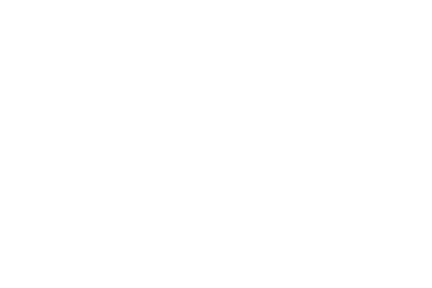

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(hist, bins=30)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [20]:
ll[7]

17.1734141485

In [21]:
ll

[0.95842972551,
 0.047304109135,
 0.39488387442,
 0.051811267644,
 0.16269031359,
 0.042495958557,
 0.14348048373299999,
 17.1734141485,
 0.082198896456,
 0.6032969928,
 0.257739879264,
 0.191219366,
 0.29995194,
 0.0105779966712,
 0.075267513204,
 0.04328469673200001,
 1.2922285145,
 0.09135967419800001,
 0.053671369834999996,
 0.48974098449,
 0.032797669815,
 0.464480832,
 0.054046423916,
 0.123001745616,
 1.33773718137,
 0.67850533108,
 0.06868316839699999,
 0.159437188944,
 0.57045621962,
 0.5168854556,
 0.0178865734125,
 0.14764970726999999,
 0.359703790272,
 0.107086159335,
 1.0951693067600001,
 0.089688977721,
 0.082649126555,
 1.11532636382,
 0.041259953987999996,
 0.227422019718,
 0.66388978067,
 0.136241717781,
 0.160828644384,
 0.05030677353,
 6.2709351712,
 0.053184806927,
 0.121959814475,
 0.053108071730999996,
 0.299306687732,
 0.17539770200399998,
 0.158005368855,
 0.386344119774,
 1.9393417897699998,
 3.00875292,
 0.78100207614,
 0.66578754032,
 0.03099465144,
 1.903489

In [22]:
x[10]

0.0

In [23]:
len(X)

117

In [24]:
N = 3

In [25]:
from numpy.random import RandomState

In [26]:
rng = RandomState(0)

pca = PCA(n_components=3, whiten=True, svd_solver = 'randomized')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [27]:
pca.noise_variance_

1.3284477191872244

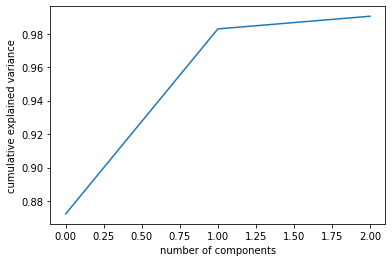

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [29]:
range(N)

range(0, 3)

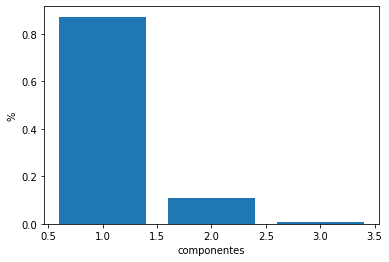

In [30]:
%matplotlib inline
plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.xlabel("componentes")
plt.ylabel("%")
plt.show()

## Soma das variancias relativas

### primeira

In [31]:
pca.explained_variance_ratio_[0]

0.8722577860960704

### primeira e segunda

In [32]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.9829044338486238

### primeira, segunda e terceira

In [33]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.9904796242892231

In [34]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [35]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [36]:
pca.components_[0]

array([0.0043866 , 0.00551612, 0.0065507 , ..., 0.00103919, 0.00095751,
       0.00088196])

In [37]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [38]:
#if max(xtemp) < 0.02:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000,601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

<IPython.core.display.Javascript object>


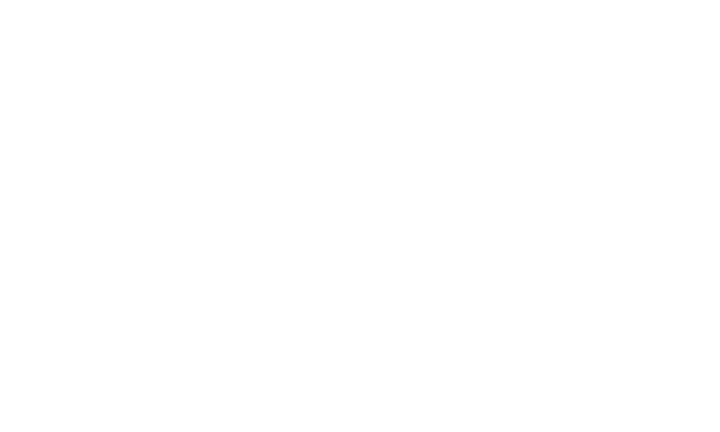

<IPython.core.display.Javascript object>


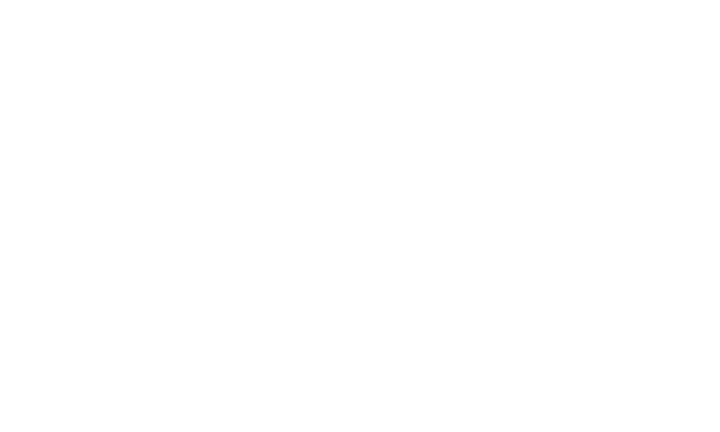

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

# Componentes

In [40]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

<IPython.core.display.Javascript object>


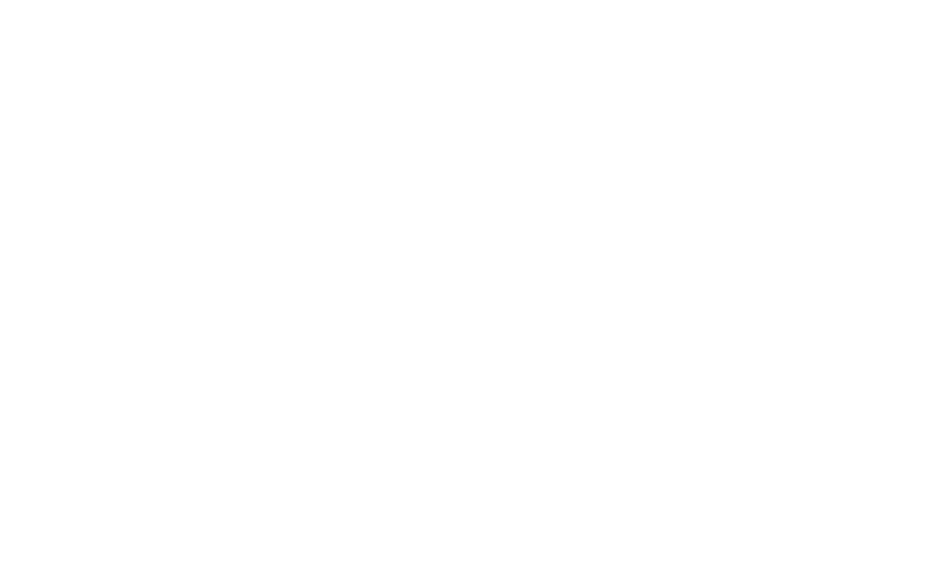

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2), value=0), Output()), _dom_classes=…

<IPython.core.display.Javascript object>


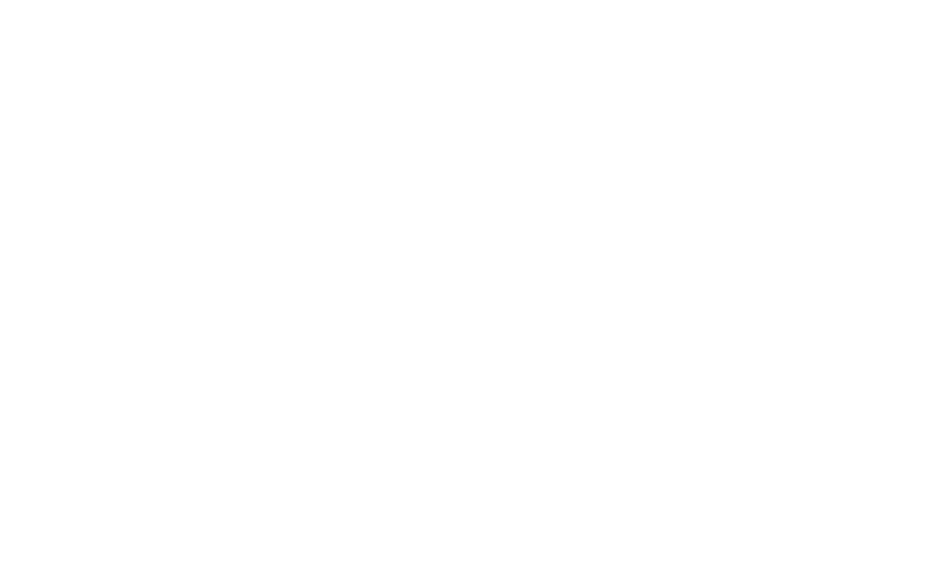

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

# Superficies com N componentes

In [42]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

<IPython.core.display.Javascript object>


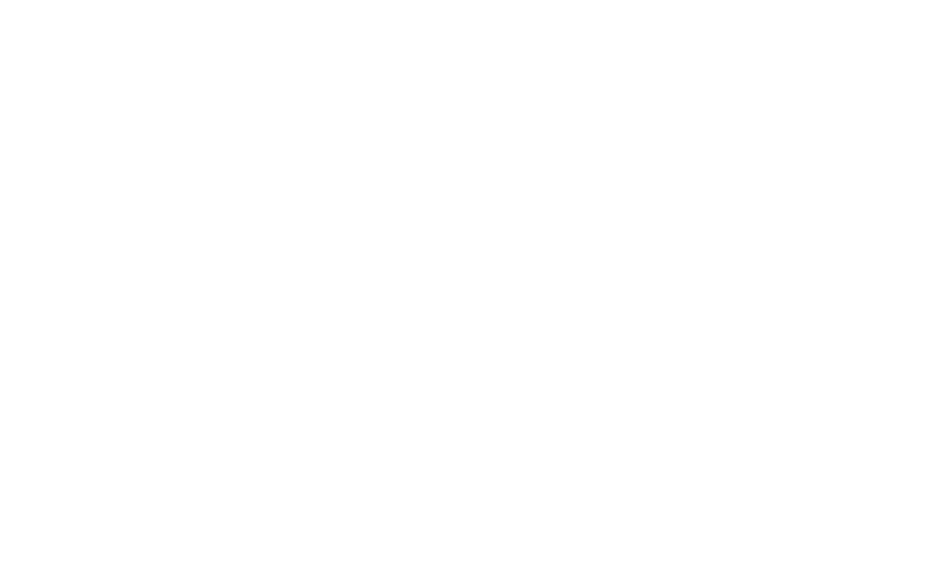

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [43]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


# Superficies originais

In [51]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

<IPython.core.display.Javascript object>


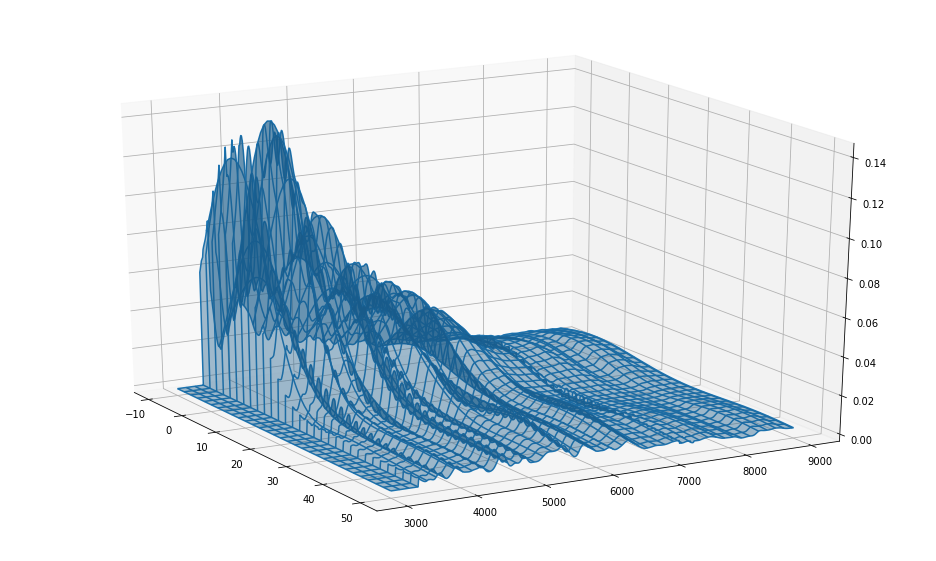

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [52]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

In [70]:
new_names[109]

'SN2007A.dat'

In [49]:
len(pca.components_[0])

36661

In [50]:
Z = interp.griddata((xx,yy),pca.components_[0],(B1,B2),method='cubic')

KeyboardInterrupt: 

In [ ]:
len(Z)

In [ ]:
teste = Z.transpose()

In [ ]:
len(teste)

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:
save_path = '/home/joao/Documentos'

In [ ]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [ ]:
Z = interp.griddata((xx,yy),pca.components_[1],(B1,B2),method='cubic')

In [ ]:
teste = Z.transpose()

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [ ]:
Z = interp.griddata((xx,yy),pca.components_[2],(B1,B2),method='cubic')

In [ ]:
teste = Z.transpose()

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [ ]:
'''
arrays = [np.array(u) for u in X]

from scipy.stats import skew


med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

teste = Z.transpose()

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2mod.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

In [ ]:
density = []

In [ ]:
for i in range(0,len(X[0])):
    
    count = 0
    
    for j in range(0,len(X)):
        
        if X[j][i] != 0:
            
            count += 1

    density.append(count)

In [ ]:
zd = np.reshape(density, (601, 61))

In [ ]:
zzd = []
xxd = []
yyd = []

for i in range(0,len(x)):

    for j in range(0,len(y)):

        zzd.append(zd[j][i])
        xxd.append(y[j])
        yyd.append(x[i])


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook
z = np.reshape(zzd, (61, 601)).T
plt.imshow(z, extent=(np.amin(yyd), np.amax(yyd), np.amax(xxd), np.amin(xxd)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,95)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()

In [ ]:
med = []
var = []
sky = []

In [ ]:
from scipy.stats import skew

In [ ]:
for i in range(0,len(X[0])):
    
    templist = []
    #templist2 = []
    count = 0
    for j in range(0,len(X)):
        
        if X[j][i] > 0:
            
            templist.append(X[j][i])
            count += 1
            
    '''    
    for j in range(0,len(templist)):
        
        if abs(templist[j]-np.mean(templist)) < np.sqrt(np.var(templist)):
            
            templist2.append(templist[j])
    '''    
    
    if count > 5:
        
        variance = np.var(templist)
        med.append(np.mean(templist)) #media
        var.append(np.sqrt(variance)) #desv pad
        sky.append((skew(templist))**(1/3)) #assimetria
        
    else:
        
        med.append(0)
        var.append(0)
        sky.append(0)

In [ ]:
Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')

In [ ]:
teste = Z.transpose()

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "med.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [ ]:
Z = interp.griddata((xx,yy),var,(B1,B2),method='cubic')

In [ ]:
teste = Z.transpose()

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "var.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [ ]:
Z = interp.griddata((xx,yy),sky,(B1,B2),method='cubic')

In [ ]:
teste = Z.transpose()

In [ ]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [ ]:
#exp_z = exp_z/max(exp_z)

In [ ]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "sky.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
